In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"E:\ny_housing_project\data\NY-House-Dataset-Cleaned.csv")


In [139]:
df.head()

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment,BOROUGH,ZIP
0,douglas elliman,315000,2,2.000000,1400.0,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal,Manhattan,10022
1,serhant,195000000,7,10.000000,17545.0,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,unknown,condo,Luxury,Manhattan,10019
2,sowae corp,260000,4,2.000000,2015.0,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal,Manhattan,10312
3,compass,69000,3,1.000000,445.0,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,unknown,condo,Outlier,Manhattan,10022
4,sotheby's,55000000,7,2.373861,14175.0,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,unknown,townhouse,Luxury,Manhattan,10065


In [140]:
df_normal = df[df['segment'] == 'Normal']
df_luxury = df[df['segment'] == 'Luxury']
df_Outlier  = df[df['segment'] == 'Outlier']

In [141]:
df_normal['BOROUGH'].value_counts()

BOROUGH
Manhattan        2870
Queens            532
Brooklyn          437
Bronx             152
Staten Island      55
Name: count, dtype: int64

In [142]:
df_normal

,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,segment,BOROUGH,ZIP
0,douglas elliman,315000,2,2.0,1400.000000,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,unknown,condo,Normal,Manhattan,10022
2,sowae corp,260000,4,2.0,2015.000000,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,unknown,house,Normal,Manhattan,10312
6,douglas elliman,899500,2,2.0,2184.207862,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777,unknown,condo,Normal,Manhattan,10027
8,pantiga inc,265000,1,1.0,750.000000,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,unknown,co op,Normal,Bronx,10473
9,century 21 mk,440000,2,1.0,978.000000,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694,unknown,co op,Normal,Brooklyn,11230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,compass,599000,1,1.0,2184.207862,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,unknown,co op,Normal,Manhattan,10075
4545,mjr real estate,245000,1,1.0,2184.207862,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,unknown,co op,Normal,Manhattan,11374
4546,douglas elliman,1275000,1,1.0,2184.207862,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,unknown,co op,Normal,Manhattan,10011
4547,e corp,598125,2,1.0,655.000000,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,unknown,condo,Normal,Queens,11373


# 1. Exploratory Data Analysis (EDA)

## 2.1. Univariate Analysis


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\1565403127.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



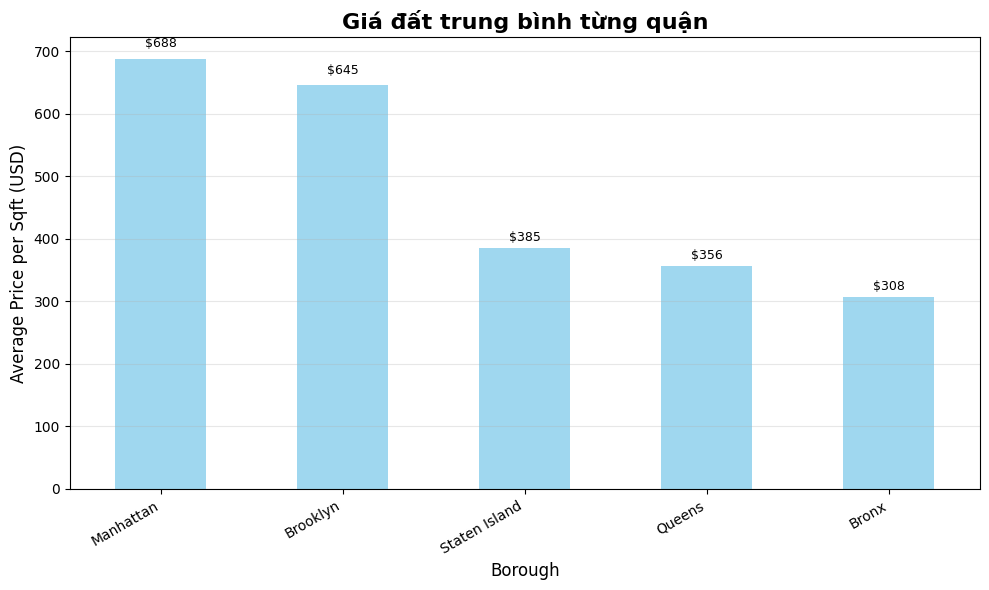

BOROUGH
Manhattan        687.90
Brooklyn         645.46
Staten Island    384.59
Queens           356.01
Bronx            307.62
Name: PRICE_PER_SQFT, dtype: float64


In [143]:
df_normal['PRICE_PER_SQFT'] = df_normal['PRICE'] / df_normal['PROPERTYSQFT']

# loại bỏ các dòng không hợp lệ
df_normal = df_normal.dropna(subset=['PRICE_PER_SQFT'])
df_normal = df_normal[df_normal['PRICE_PER_SQFT'] > 0]
# tính trung bình theo quận
price_sqft_by_borough = df_normal.groupby('BOROUGH')['PRICE_PER_SQFT'].mean().sort_values(ascending=False)

# vẽ bar chart
plt.figure(figsize=(10,6))
price_sqft_by_borough.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Giá đất trung bình từng quận", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)", fontsize=12)
plt.xlabel("Borough", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)

# thêm label trên cột
for i, val in enumerate(price_sqft_by_borough):
    plt.text(i, val * 1.02, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(price_sqft_by_borough.round(2))


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\3671596279.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



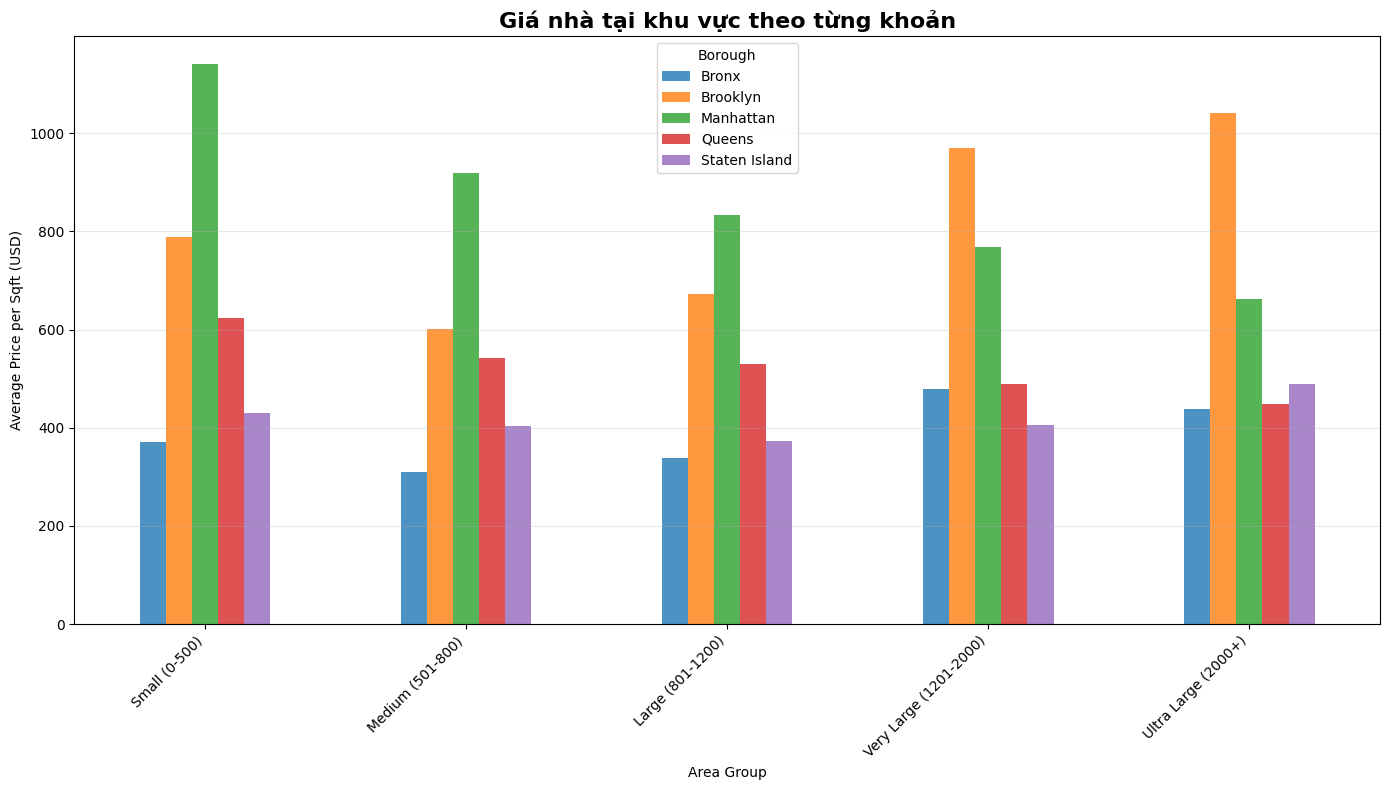

AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                 370.0       310.266186       338.682625   
Brooklyn         789.188354        600.95967       672.496554   
Manhattan        1139.81617       917.637333       832.633288   
Queens           622.816153       542.562266       529.738612   
Staten Island    429.236106        404.05912       372.255734   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                     479.594279          437.605452  
Brooklyn                  968.813711          1041.43859  
Manhattan                 768.065355          661.938956  
Queens                    488.922856          448.699764  
Staten Island             406.428099           488.80265  


In [144]:

df_clean = df_normal.copy()
df_clean['PROPERTYSQFT'] = df_clean['PROPERTYSQFT'].replace(2184.207862, pd.NA)
df_clean['PRICE_PER_SQFT'] = df_clean['PRICE'] / df_clean['PROPERTYSQFT']
df_clean = df_clean.dropna(subset=['PRICE_PER_SQFT'])
df_clean = df_clean[df_clean['PRICE_PER_SQFT'] > 0]

df_clean['AreaGroup'] = pd.cut(
    df_clean['PROPERTYSQFT'],
    bins=[0, 500, 800, 1200, 2000, float('inf')],
    labels=['Small (0-500)', 'Medium (501-800)', 'Large (801-1200)', 
            'Very Large (1201-2000)', 'Ultra Large (2000+)']
)

price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

price_sqft_grouped.T.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title("Giá nhà tại khu vực theo từng khoản", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)")
plt.xlabel("Area Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(price_sqft_grouped.round(2))


In [145]:
# Giá trung bình / sqft theo quận & nhóm diện tích
price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

print("Average Price per Sqft by Borough and Area Group:")
print(price_sqft_grouped.round(2))

# Tính tỷ lệ % thay đổi giữa các nhóm diện tích
price_sqft_change = price_sqft_grouped.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
AreaGroup     Small (0-500) Medium (501-800) Large (801-1200)  \
BOROUGH                                                         
Bronx                 370.0       310.266186       338.682625   
Brooklyn         789.188354        600.95967       672.496554   
Manhattan        1139.81617       917.637333       832.633288   
Queens           622.816153       542.562266       529.738612   
Staten Island    429.236106        404.05912       372.255734   

AreaGroup     Very Large (1201-2000) Ultra Large (2000+)  
BOROUGH                                                   
Bronx                     479.594279          437.605452  
Brooklyn                  968.813711          1041.43859  
Manhattan                 768.065355          661.938956  
Queens                    488.922856          448.699764  
Staten Island             406.428099           488.80265  

Percentage change compared to previous Area Group:
AreaGroup     Small (0-500)  

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\683740668.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\683740668.py:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



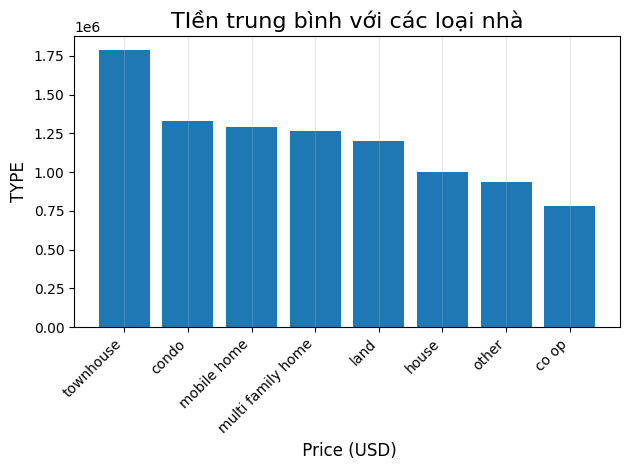

In [146]:
avg_type = df_normal.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TIền trung bình với các loại nhà', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\4036172886.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



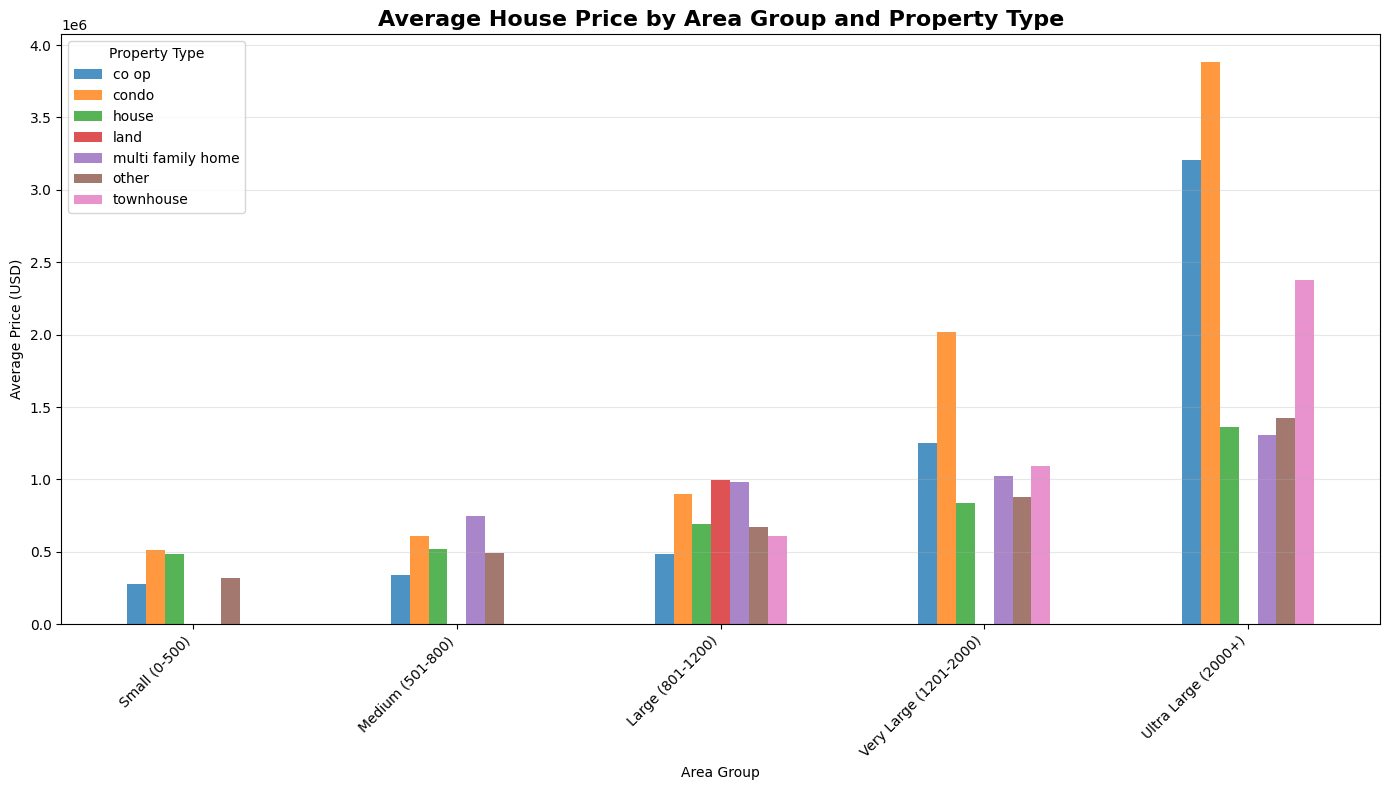

PROPERTY_TYPE                co op       condo       house      land  \
AreaGroup                                                              
Small (0-500)            275606.03   513999.96   482250.00       NaN   
Medium (501-800)         339016.60   609570.69   518533.20       NaN   
Large (801-1200)         487392.20   902567.64   691458.21  999000.0   
Very Large (1201-2000)  1251530.43  2015847.61   840760.96       NaN   
Ultra Large (2000+)     3208531.25  3880321.98  1360096.30       NaN   

PROPERTY_TYPE           multi family home       other   townhouse  
AreaGroup                                                          
Small (0-500)                         NaN   319126.71         NaN  
Medium (501-800)                750000.00   490142.35         NaN  
Large (801-1200)                979200.00   668912.21   607979.27  
Very Large (1201-2000)         1022282.80   875684.88  1090795.38  
Ultra Large (2000+)            1307486.06  1422665.64  2376495.77  


In [147]:

price_by_area_type = df_clean.groupby(['AreaGroup', 'PROPERTY_TYPE'])['PRICE'].mean().unstack()

# vẽ chart
price_by_area_type.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title('Average House Price by Area Group and Property Type', fontsize=16, fontweight='bold')
plt.xlabel('Area Group')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Property Type')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(price_by_area_type.round(2))


In [148]:

print("Average Price per Sqft by Borough and Area Group:")
print(price_by_area_type.round(2))

# Tính tỷ lệ % thay đổi giữa các nhóm diện tích
price_sqft_change = price_by_area_type.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
PROPERTY_TYPE                co op       condo       house      land  \
AreaGroup                                                              
Small (0-500)            275606.03   513999.96   482250.00       NaN   
Medium (501-800)         339016.60   609570.69   518533.20       NaN   
Large (801-1200)         487392.20   902567.64   691458.21  999000.0   
Very Large (1201-2000)  1251530.43  2015847.61   840760.96       NaN   
Ultra Large (2000+)     3208531.25  3880321.98  1360096.30       NaN   

PROPERTY_TYPE           multi family home       other   townhouse  
AreaGroup                                                          
Small (0-500)                         NaN   319126.71         NaN  
Medium (501-800)                750000.00   490142.35         NaN  
Large (801-1200)                979200.00   668912.21   607979.27  
Very Large (1201-2000)         1022282.80   875684.88  1090795.38  
Ultra Large (2000+)            130748

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\3603998260.py:5: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



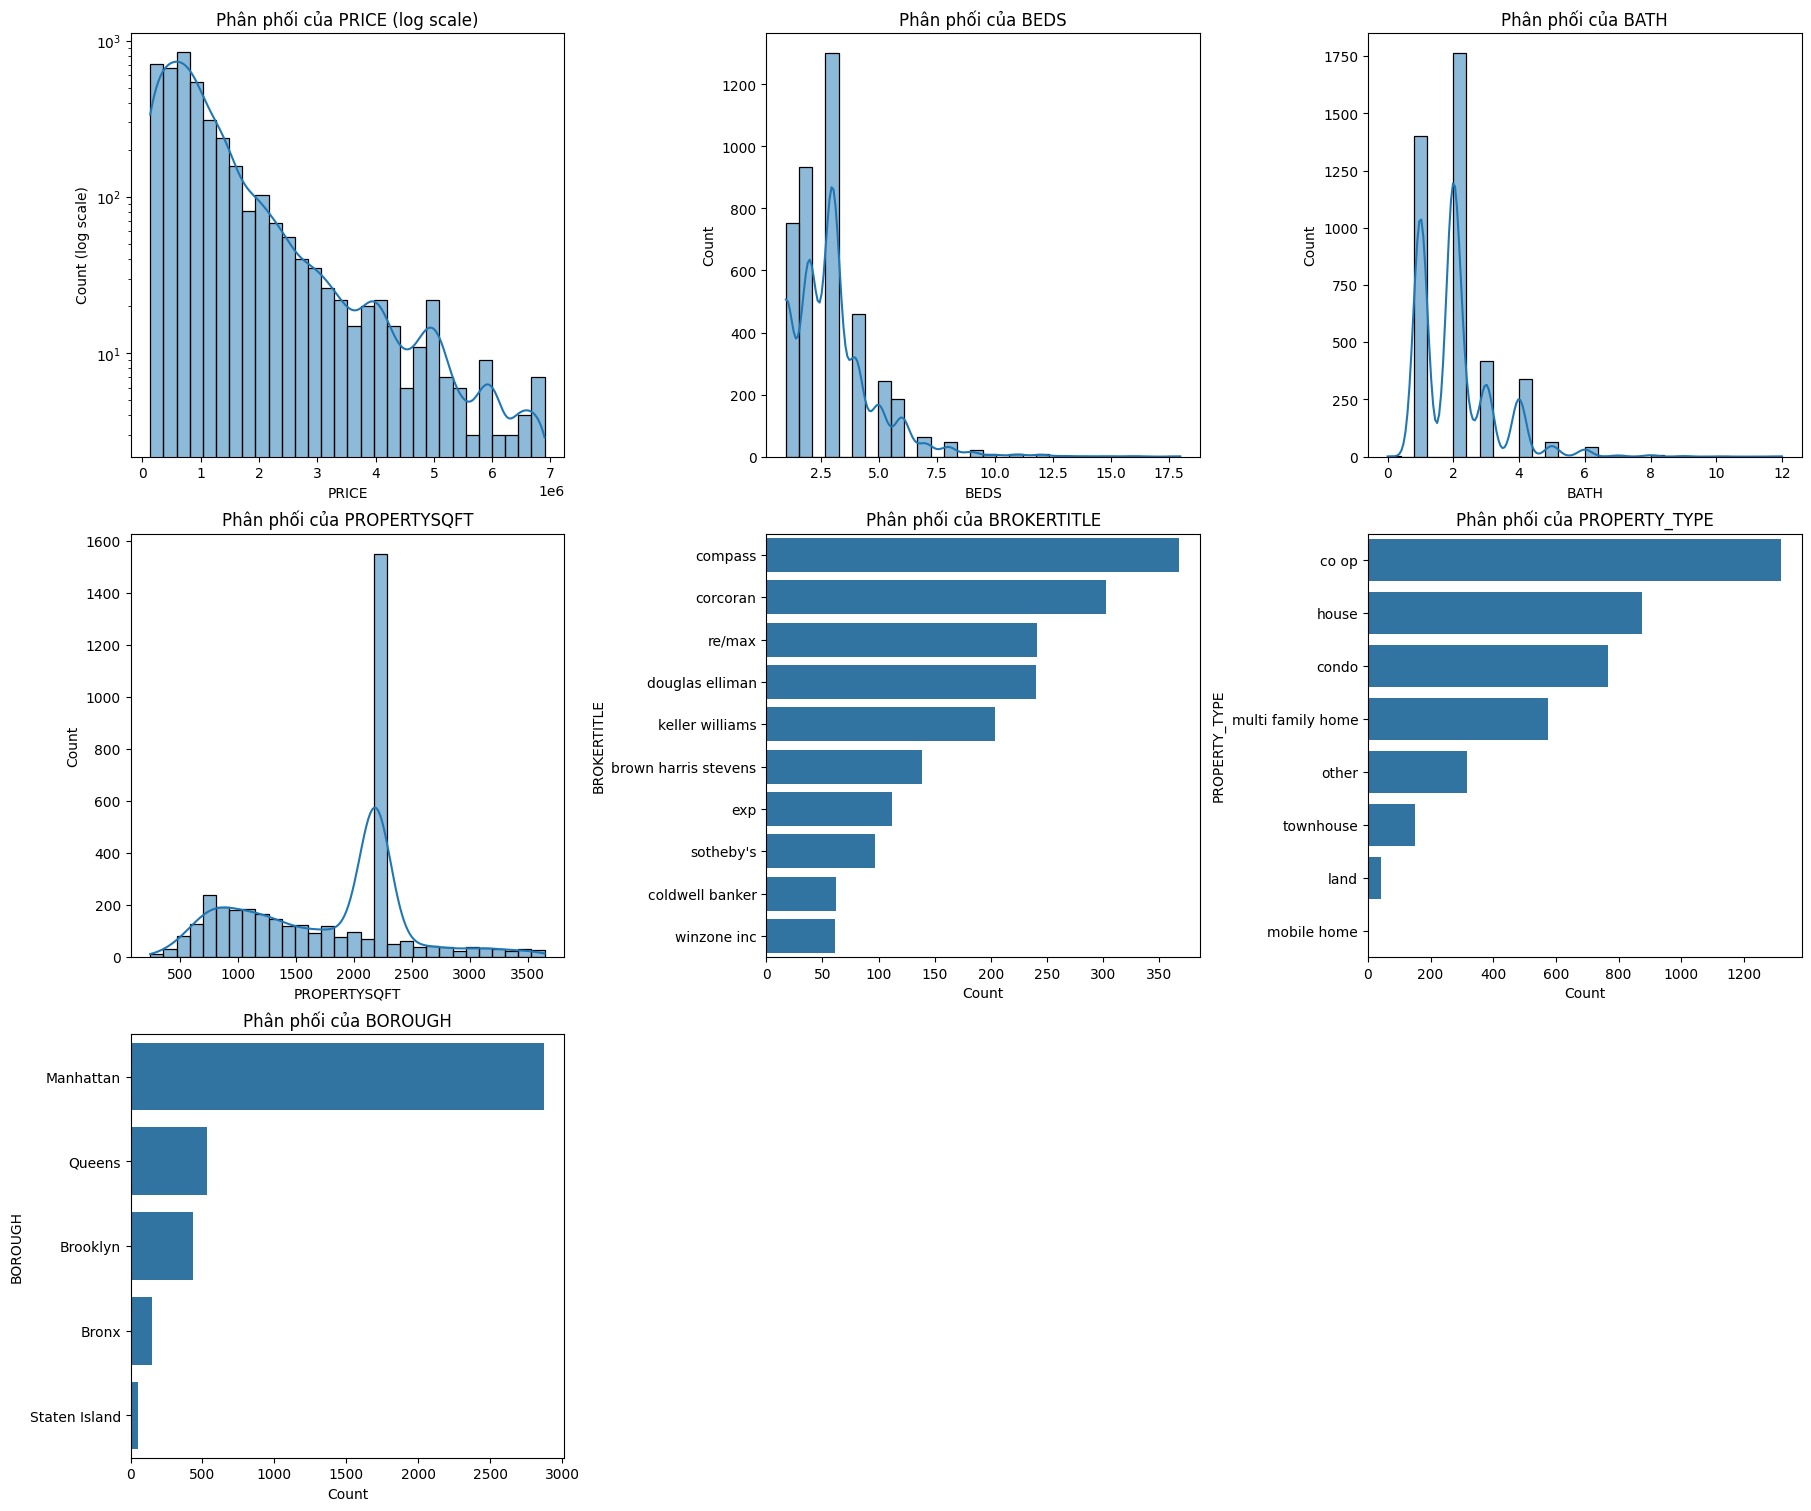

In [149]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Phân phối của {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [174]:
df = df_normal[df_normal['PROPERTYSQFT'] == 2184.207862]
df['PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
co op                688
house                248
multi family home    234
condo                108
other                 98
townhouse             43
land                  42
mobile home            1
Name: count, dtype: int64


## 1. Phân phối giá nhà (PRICE)
- Giá nhà phân bố **lệch phải mạnh** (right-skewed).  
- Hai cụm giá chính xuất hiện:
  - **0.5M – 1M USD**: chiếm đa số.
  - **1.5M – 2M USD**: tạo thành cụm phụ, thường là căn hộ/townhouse ở Manhattan hoặc Brooklyn.  
- Giá trên 2.5M giảm dần nhưng vẫn có một số trường hợp cao đến gần 7M (vẫn nằm trong phân khúc Normal, chưa tính Luxury).  

## 2. Phân phối số phòng ngủ (BEDS)
- Phần lớn nhà có **2–3 phòng ngủ**, đúng với phân khúc đại chúng.  
- Số lượng nhà từ 5 phòng trở lên giảm mạnh, hiếm gặp.  

## 3. Phân phối số phòng tắm (BATH)
- Tương tự phòng ngủ, phổ biến nhất là **1–2 phòng tắm**.  
- Từ 4 phòng tắm trở lên rất ít → chủ yếu thuộc nhóm diện tích lớn, giá cao hơn.  

## 4. Phân phối diện tích (PROPERTYSQFT)
- Phổ biến trong khoảng **500 – 1500 sqft**, phù hợp hộ gia đình nhỏ/ trung bình.  
- Có một “đuôi dài” với diện tích >2000 sqft, thường nằm ở nhóm giá cao hơn.  

## 5. Phân phối theo môi giới (BROKERTITLE)
- Một số broker lớn chiếm ưu thế: **RE/MAX, Compass, Corcoran, Douglas Elliman, Keller Williams**.  
- Các broker này chi phối phần lớn nguồn cung trên thị trường.  

## 6. Phân phối theo loại nhà (PROPERTY_TYPE)
- Chủ yếu là **condo, co-op, house**.  
- Các loại townhouse, multi-family home, land chiếm tỷ lệ nhỏ hơn.  

## 7. Phân phối theo khu vực (BOROUGH)
- **Manhattan áp đảo** về số lượng listing.  
- Theo sau là **Brooklyn, Queens**, trong khi Bronx và Staten Island chỉ chiếm tỷ trọng nhỏ.  

---

### 🔑 Insight chính từ phân tích đơn biến
1. **Giá nhà phổ thông ở NYC chia làm hai cụm chính**: 0.5M–1M và 1.5M–2M.  
2. **2–3 phòng ngủ, 1–2 phòng tắm, diện tích 500–1500 sqft** là đặc trưng chung.  
3. **Condo và co-op** là loại hình chiếm ưu thế → phản ánh nhu cầu thị trường đô thị.  
4. **Manhattan là trung tâm** của thị trường Normal segment, cả về số lượng và giá trị.  
5. Thị trường bị chi phối mạnh bởi **một số broker lớn**.  



## 2.2. Multivariate Analysis

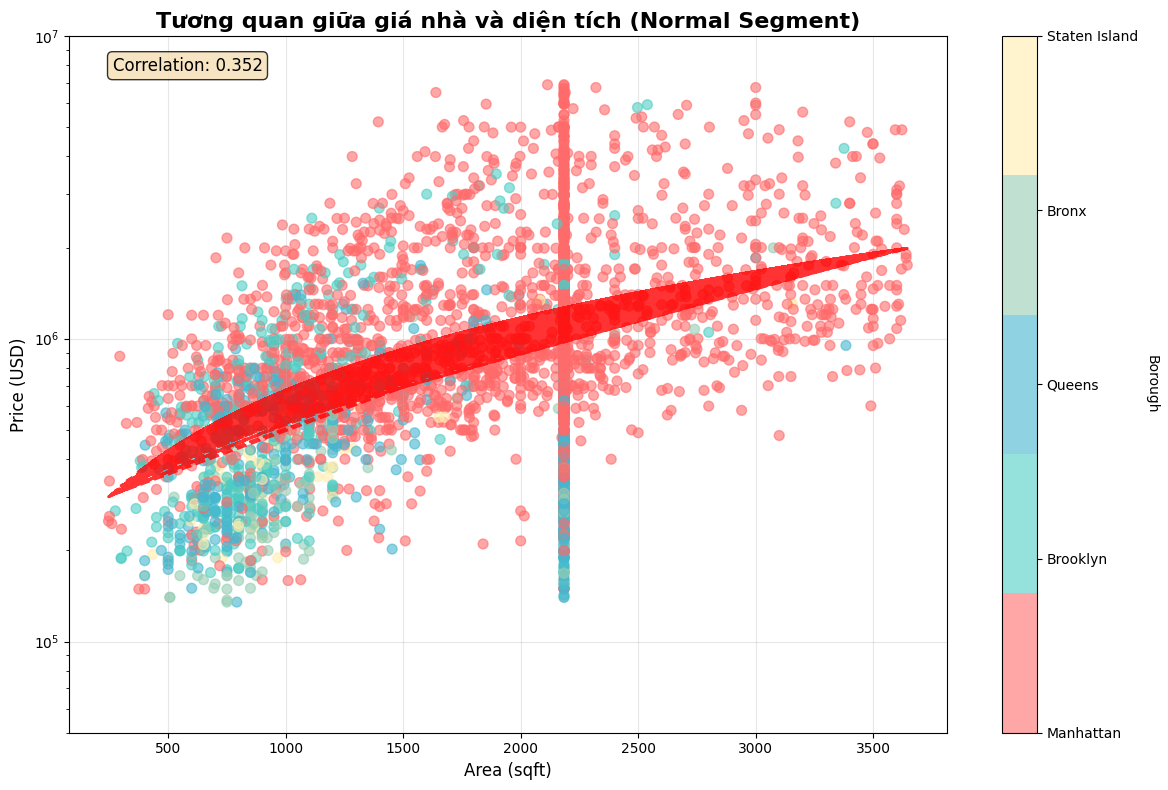

In [150]:
import matplotlib.colors  


# Nếu chỉ muốn Manhattan, lọc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # Màu cố định

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Thêm đường xu hướng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Thêm hệ số tương quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Thêm colorbar với nhãn rời rạc
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('Tương quan giữa giá nhà và diện tích (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

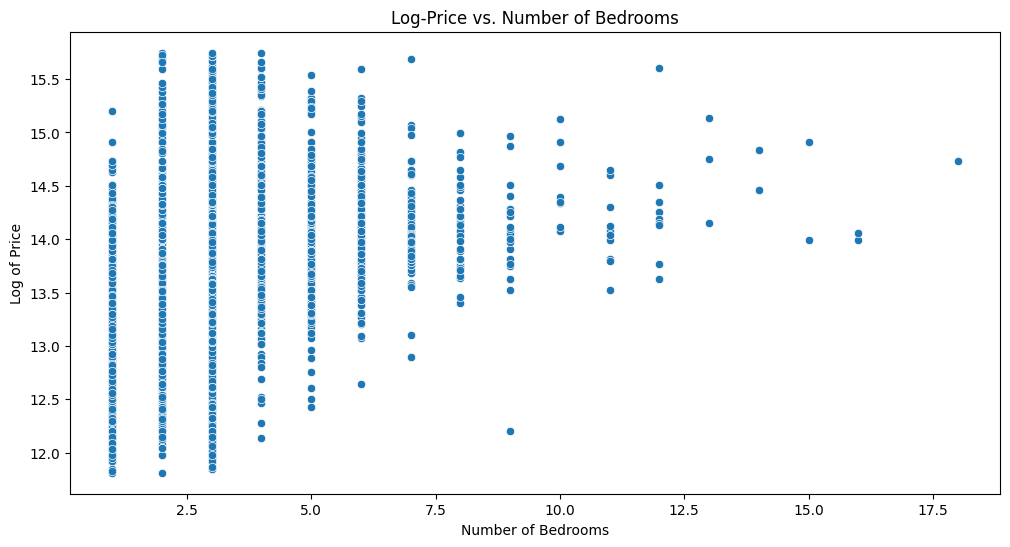

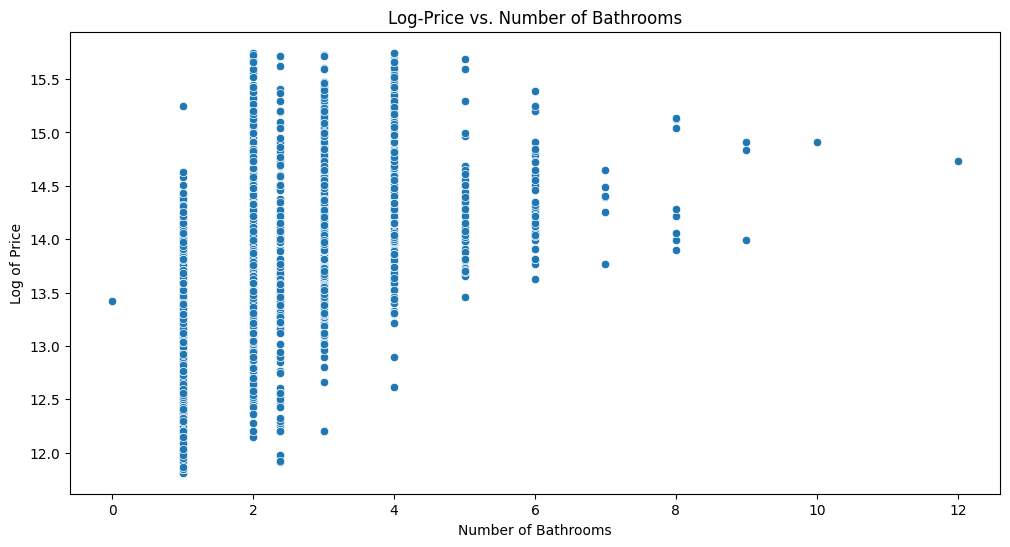

0.3983014579304214 0.573795516876969


In [151]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [152]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

Số phòng là yếu tố quan trọng nhưng không quyết định duy nhất giá nhà.

In [153]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("Các nhà môi giới có giá niêm yết trung vị cao nhất:")
print(price_range_per_broker.head())

print("\nCác nhà môi giới có giá niêm yết trung bình cao nhất:")
print(average_price_per_broker.head())

print("\nCác nhà môi giới có nhiều niêm yết nhất:")
print(total_listings_per_broker.head())

Các nhà môi giới có giá niêm yết trung vị cao nhất:
                                min      max     median
BROKERTITLE                                            
dolly lenz real estate      6500000  6500000  6500000.0
nest seekers  internationa  5999000  5999000  5999000.0
industrie rential           4895000  4895000  4895000.0
onekey mls realmart         4680000  4680000  4680000.0
landair property advisors   2200000  6100000  4150000.0

Các nhà môi giới có giá niêm yết trung bình cao nhất:
BROKERTITLE
dolly lenz real estate        6500000.0
nest seekers  internationa    5999000.0
industrie rential             4895000.0
onekey mls realmart           4680000.0
landair property advisors     4150000.0
Name: PRICE, dtype: float64

Các nhà môi giới có nhiều niêm yết nhất:
BROKERTITLE
compass            368
corcoran           303
re/max             241
douglas elliman    240
keller williams    204
Name: count, dtype: int64


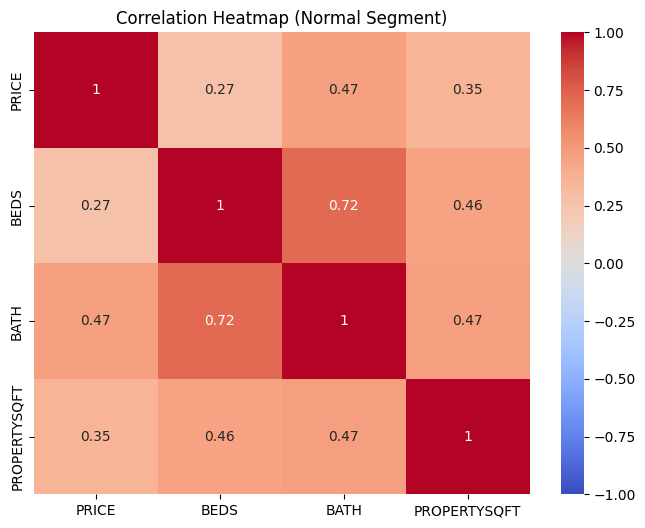

In [154]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# Tính ma trận tương quan
corr_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()


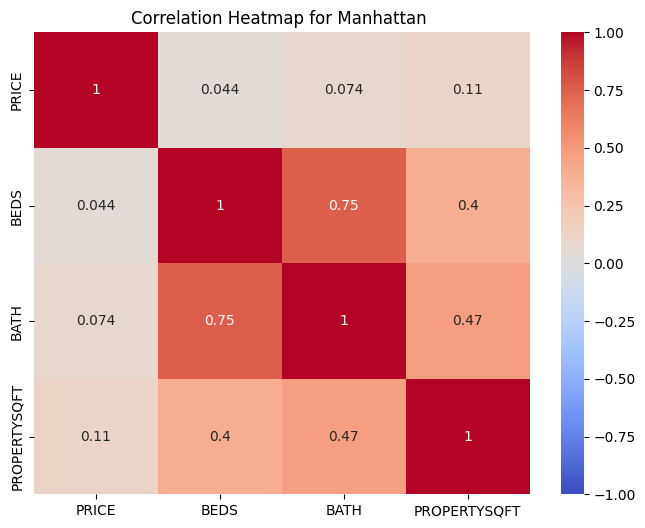

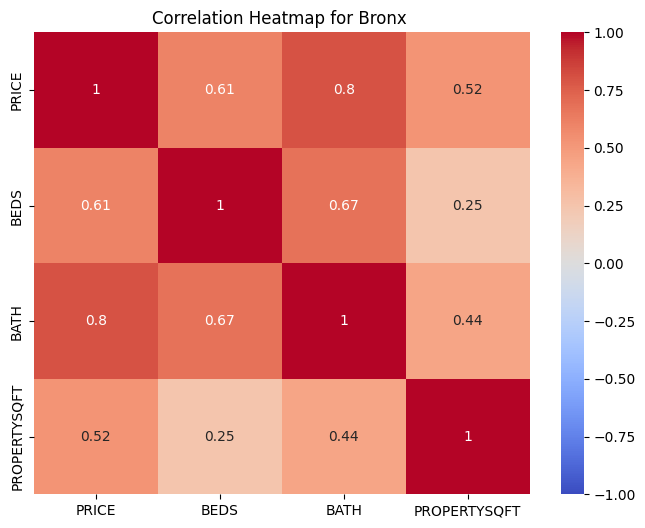

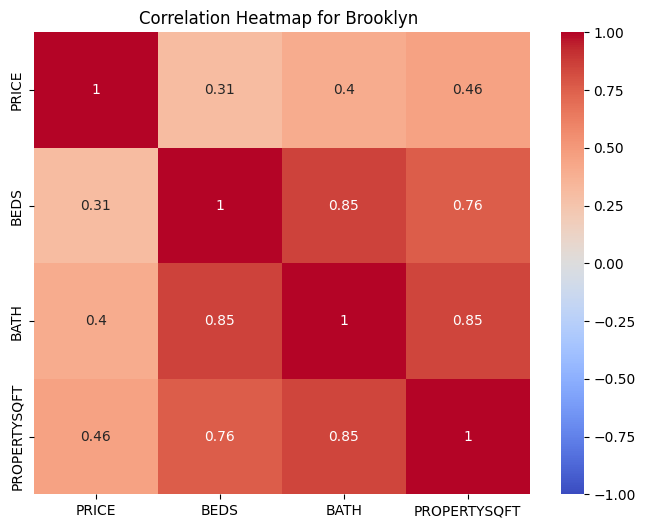

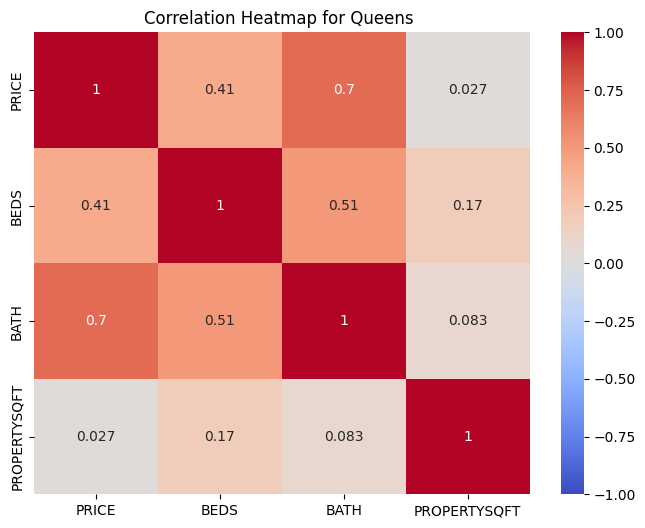

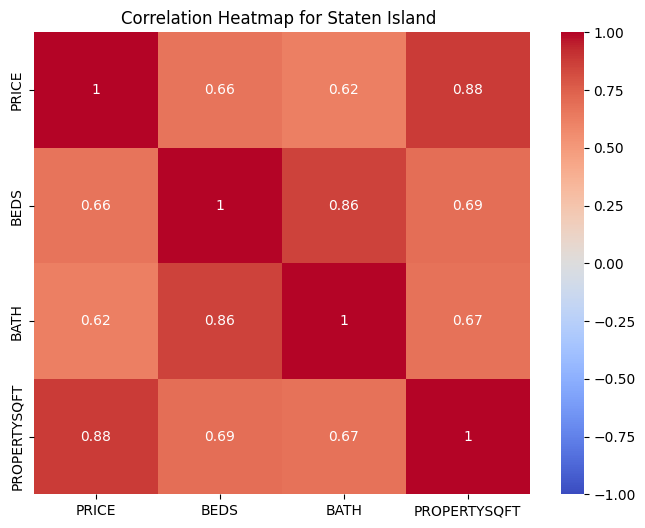

In [155]:
boroughs = df['BOROUGH'].unique()

# Vòng lặp qua từng quận để vẽ heatmap
for borough in boroughs:
    # Lọc dữ liệu theo quận
    df_borough = df[df['BOROUGH'] == borough]
    
    # Chọn các cột số
    numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
    df_numeric = df_borough[numeric_cols].dropna()  # Loại bỏ giá trị NaN
    
    # Tính ma trận tương quan
    corr_matrix = df_numeric.corr()
    
    # Vẽ heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap for {borough} ')
    plt.show()

In [156]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\784580992.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [157]:
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")

top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" Các nhà môi giới hàng đầu theo số lượng niêm yết",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [158]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Giá trung bình của các đơn vị được môi giới bởi 10 nhà môi giới hàng đầu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [159]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Phân bố địa lý của 10 nhà môi giới hàng đầu trên khắp các địa phương khác nhau",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [160]:
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Phân bố địa lý của 10 nhà môi giới hàng đầu")

fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\4247372228.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [161]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean',          
}).reset_index()

print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT      BEDS      BATH
0  brown harris stevens   1787.224273  2.517986  1.964903
1       coldwell banker   1823.239034  3.096774  2.161290
2               compass   1819.313201  2.467391  1.834545
3              corcoran   1682.658081  2.389439  1.896426
4       douglas elliman   1791.843210  2.554167  1.894782
5                   exp   1689.950039  3.267857  2.024533
6       keller williams   1798.636648  2.965686  1.897655
7                re/max   1676.667303  3.365145  2.246327
8             sotheby's   1984.709369  2.659794  2.124965
9           winzone inc   1847.246361  3.196721  1.924162


## luxury analyst


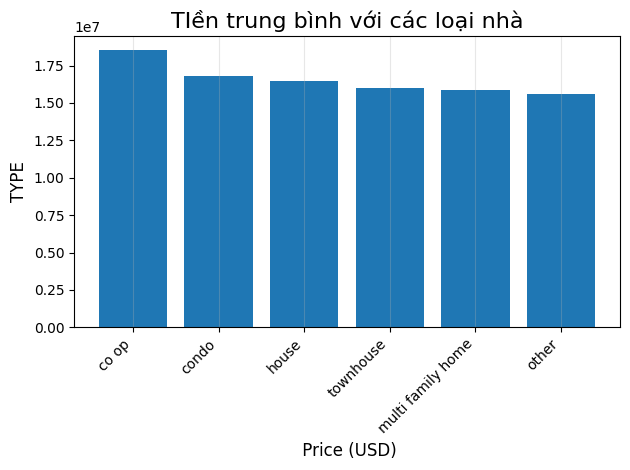

In [162]:
avg_type = df_luxury.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TIền trung bình với các loại nhà', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

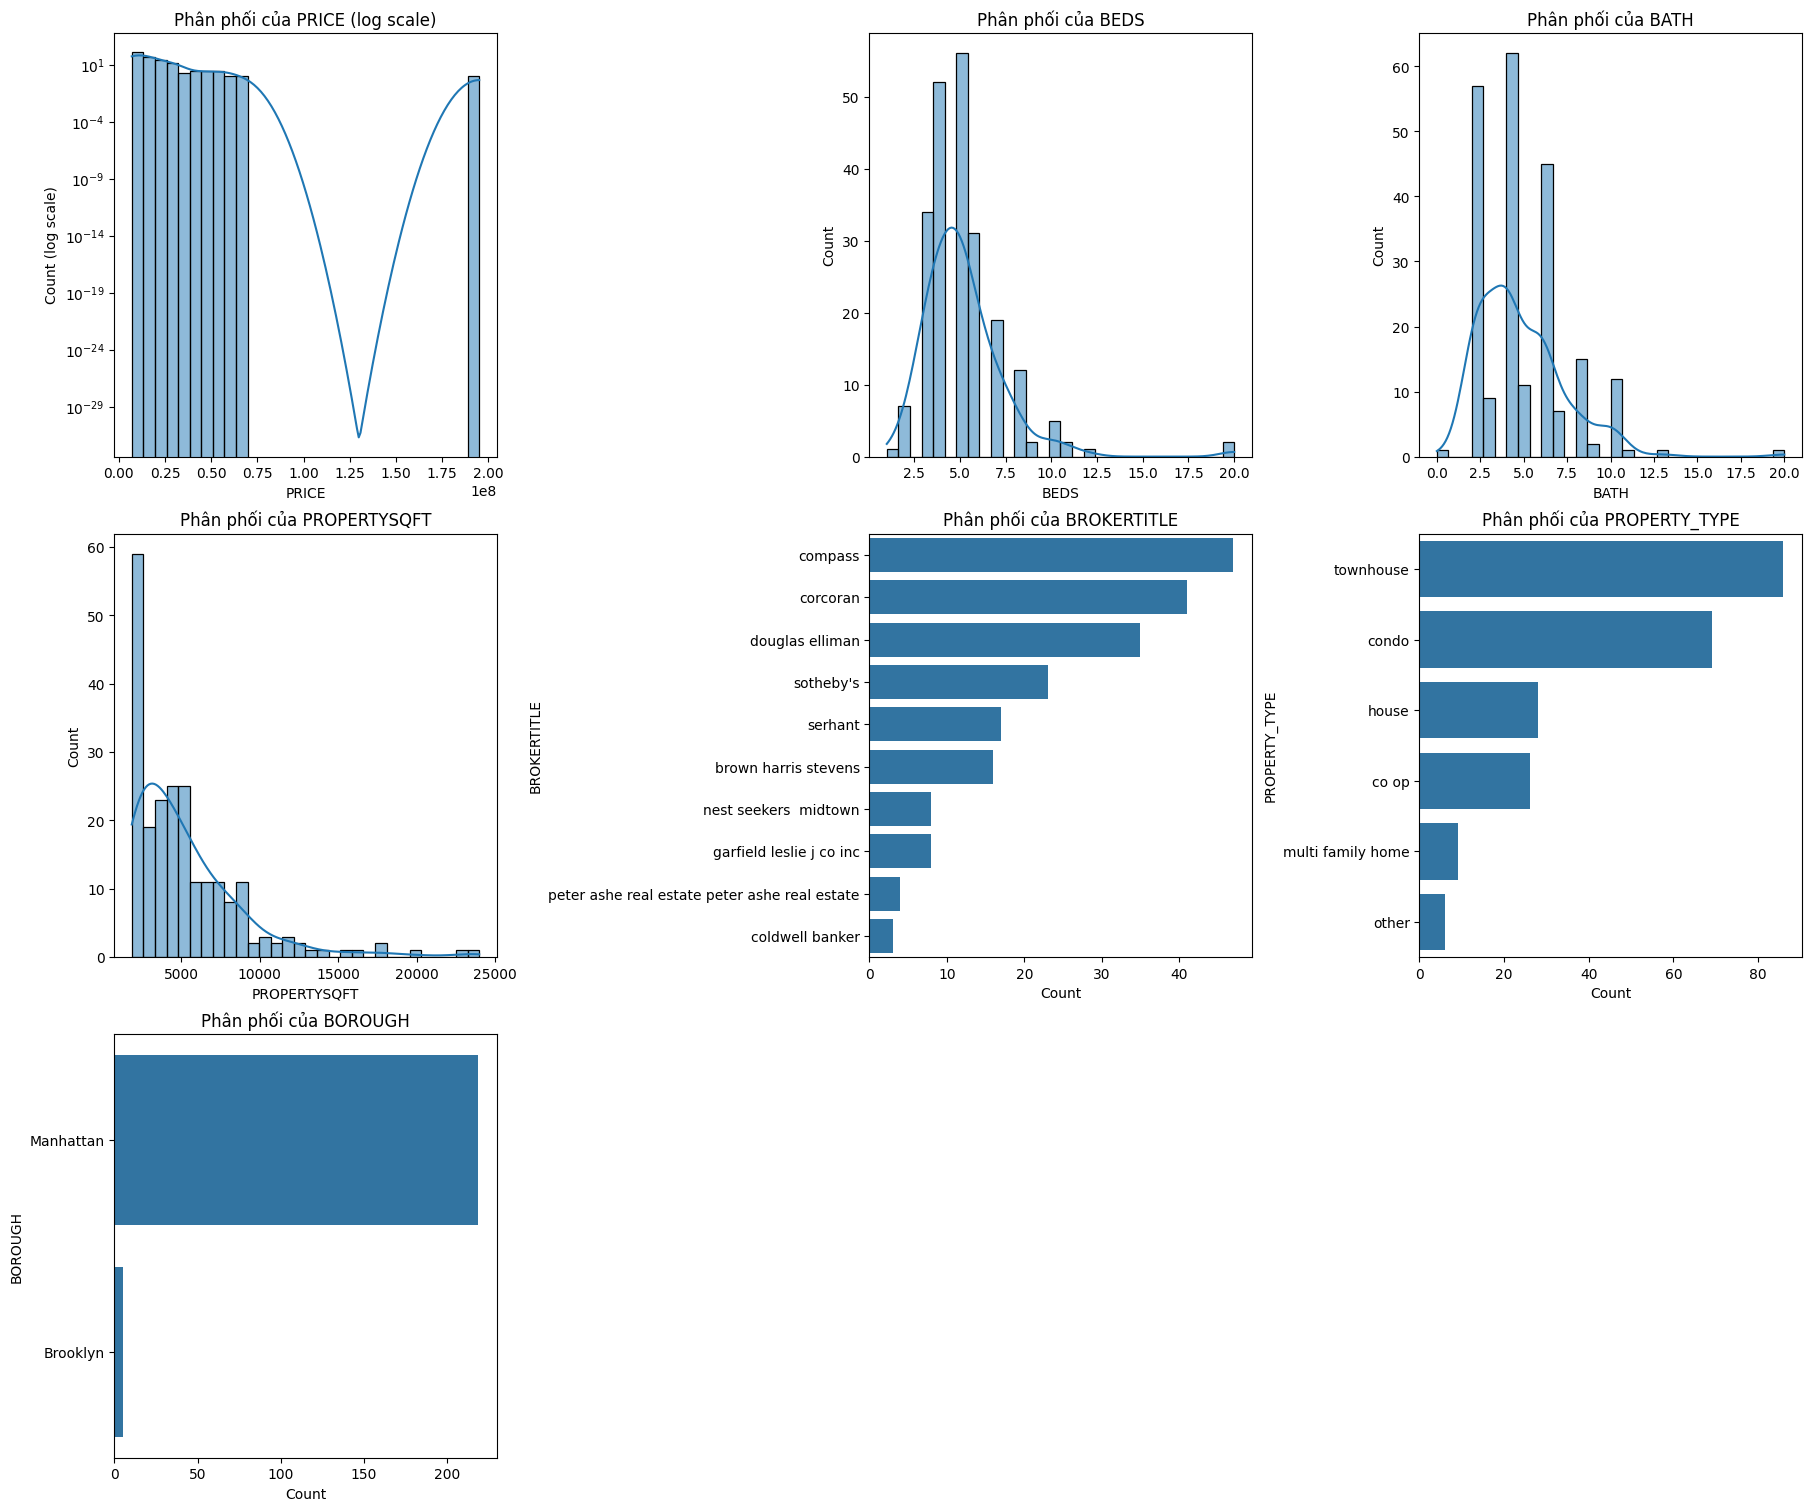

In [163]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Phân phối của {column} (log scale)')
            ax.set_ylabel('Count (log scale)')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### 1. Phân phối giá nhà (PRICE)
- Giá nhà luxury trải rộng từ **5M đến gần 200M USD**.  
- Phân phối lệch phải, nhưng khác với Normal, phần đuôi kéo dài tới hàng trăm triệu USD.  
- Xuất hiện rõ rệt một số **căn siêu sang (super luxury)** trên 50M, kéo trung bình giá lên cao.  

### 2. Phân phối số phòng ngủ (BEDS)
- Phổ biến từ **3–6 phòng ngủ**.  
- Xuất hiện một số căn biệt thự/townhouse có **10+ phòng ngủ**, hiếm nhưng đặc trưng cho phân khúc này.  

### 3. Phân phối số phòng tắm (BATH)
- Đa số có **3–6 phòng tắm**, đi kèm với số phòng ngủ lớn.  
- Một số ít trường hợp cực đoan có trên 10 phòng tắm → biệt thự hoặc căn hộ penthouse nhiều tầng.  

### 4. Phân phối diện tích (PROPERTYSQFT)
- Luxury chủ yếu từ **3,000 – 10,000 sqft**.  
- Một số căn cực lớn trên **20,000 sqft**, thường là biệt thự hoặc penthouse.  

### 5. Phân phối theo môi giới (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** dẫn đầu số lượng listing luxury.  
- Các môi giới chuyên phân khúc cao cấp khác: **Serhant, Sotheby’s, Brown Harris Stevens**.  
- Thị trường luxury tập trung trong tay một số ít broker uy tín, mang tính chuyên biệt cao.  

### 6. Phân phối theo loại nhà (PROPERTY_TYPE)
- Luxury tập trung nhiều nhất vào **condo cao cấp và townhouse**.  
- House đơn lập và co-op có nhưng ít hơn.  
- Multi-family home hầu như không xuất hiện trong luxury.  

### 7. Phân phối theo khu vực (BOROUGH)
- **Manhattan áp đảo gần như tuyệt đối**, chỉ một phần rất nhỏ luxury ở Brooklyn.  
- Không có luxury ở Queens, Bronx hay Staten Island.  

---

#### 🔑 Insight chính từ phân tích đơn biến Luxury Segment
1. **Luxury ở NYC gần như đồng nghĩa với Manhattan**, nơi tập trung toàn bộ nguồn cung cao cấp.  
2. Giá dao động rộng, từ **5M – 200M USD**, với một số siêu phẩm kéo phân phối lên cực đoan.  
3. Đặc điểm căn hộ luxury: **diện tích lớn (3,000–10,000 sqft), nhiều phòng (3–6 phòng ngủ, 3–6 phòng tắm)**.  
4. Thị trường được chi phối bởi **một nhóm broker cao cấp**, nổi bật là Compass, Douglas Elliman, Corcoran, Serhant và Sotheby’s.  
5. **Condo & townhouse** là hình thức chính của luxury, phản ánh đặc thù đô thị Manhattan.  

➡️ Luxury segment tại NYC có tính tập trung cực cao về cả **địa lý (Manhattan)** lẫn **broker**. Đây là thị trường khác biệt hoàn toàn so với Normal segment, phục vụ nhóm khách hàng siêu giàu.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\1141401786.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



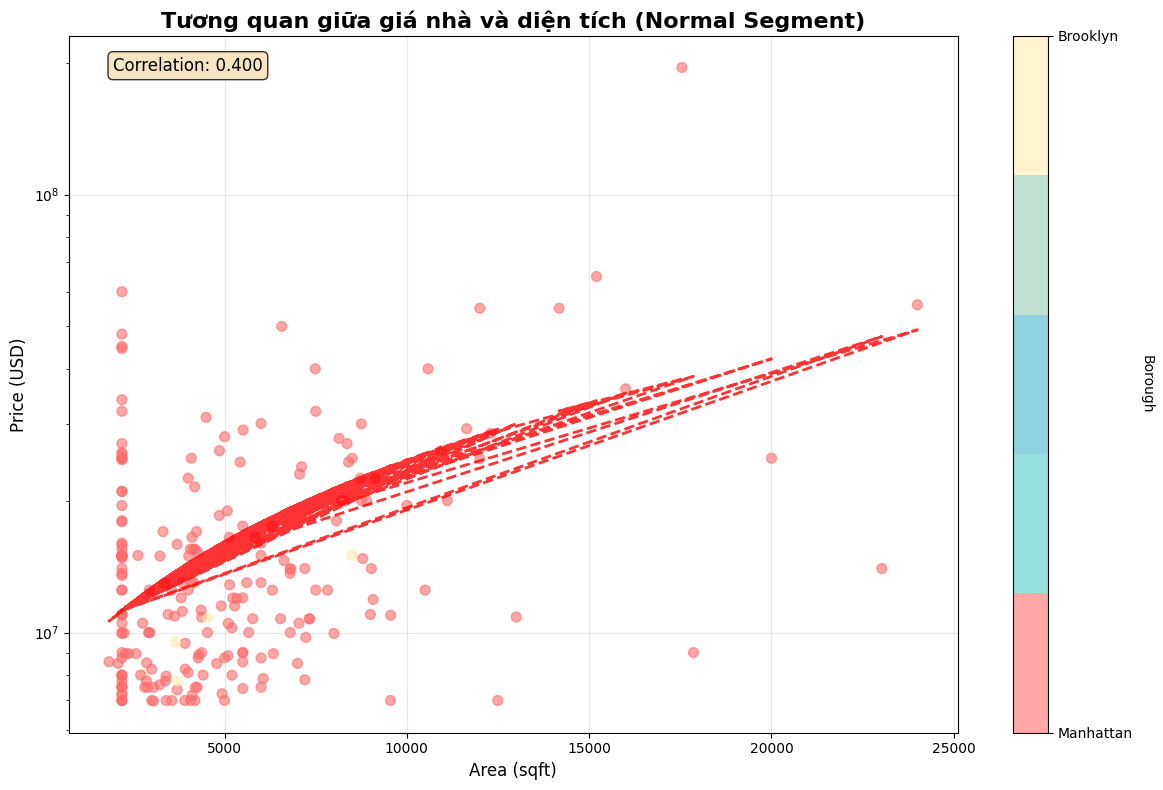

In [164]:


# Nếu chỉ muốn Manhattan, lọc: df_normal = df_normal[df_normal['BOROUGH'] == 'Manhattan']

borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # Màu cố định

df_luxury['BOROUGH_CODE'] = df_luxury['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], alpha=0.6, 
                      c=df_luxury['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Thêm đường xu hướng
z = np.polyfit(df_luxury['PROPERTYSQFT'], df_luxury['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_luxury['PROPERTYSQFT'], p(df_luxury['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Thêm hệ số tương quan
correlation = df_luxury[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Thêm colorbar với nhãn rời rạc
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('Tương quan giữa giá nhà và diện tích (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
# plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\3798432295.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



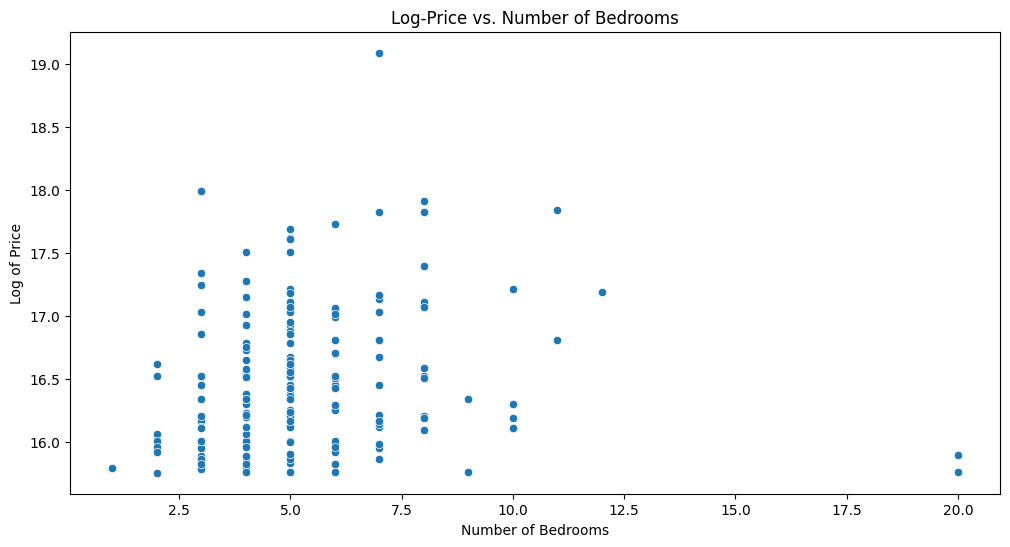

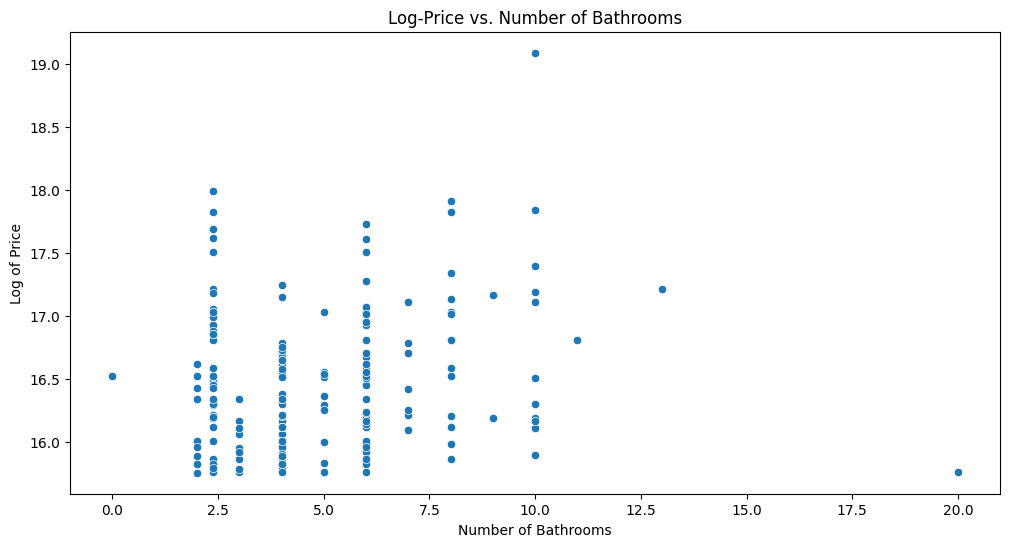

0.16176406731202345 0.20058720278501338


In [165]:
df_luxury['LOG_PRICE'] = np.log(df_luxury['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_luxury)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BEDS'])
bath_log_price_corr = df_luxury['LOG_PRICE'].corr(df_luxury['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [166]:
import plotly.express as px

fig = px.scatter_mapbox(df_luxury, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11888\1400820636.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

